# Description

Display the backtest results as the output of the `ForecastEvaluator`, created in `Master_research_backtest_analyzer` notebook.

The user provides a list of the outputs of the 2nd stage of the backtest, and the notebook displays the portfolio stats for the provided runs.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging

import pandas as pd

import core.config as cconfig
import core.plotting as coplotti
import dataflow.model as dtfmod
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton
Don't recognize host: host_os_name=Linux, am_host_os_name=Linux


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-13b2ce44-eada-422d-8aa7-85a5d6921a60.json'
INFO  # Git
  branch_name='CMTask7636_create_a_notebook_for_loading_backtest_portfolio'
  hash='47fc6dbfc'
  # Last commits:
    * 47fc6dbfc Daniil Tikhomirov CMTask7636: Add empty line                                        (   4 hours ago) Fri Apr 12 11:43:21 2024  (HEAD -> CMTask7636_create_a_notebook_for_loading_backtest_portfolio)
    * a2d8cf73c Daniil Tikhomirov CMTask7636: Add config                                            (   4 hours ago) Fri Apr 12 11:24:50 2024  (origin/CMTask7636_create_a_notebook_for_loading_backtest_portfolio)
    * 61db95ca8 Daniil Tikhomirov CMTask7636: Initialize the notebook                               (   4 hours ago) Fri Apr 12 10:56:11 2024           
# Machine info
  system=Linux
  node name=b792123eafff
  release=5.15.0-1056-aws
  version=#61~20.04.1-Ubuntu SMP Wed Mar 13 17:40:41 UTC 20

# Build the config dict

In [4]:
# Get config from env when running the notebook via the `run_notebook.py` script.
default_config = cconfig.get_config_from_env()
if default_config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    default_config_dict = {
        # Provide a list of experiment output dirs for analysis.
        "system_log_dirs": [
            "/shared_data/backtest.danya/build_tile_configs.C11a.ccxt_v8_1-all.5T.2023-01-01_2024-03-20.ins.run0/portfolio_dfs/20240331_204543/optimizer_config_dict:constant_correlation_penalty=5000",
            "/shared_data/backtest.danya/build_tile_configs.C11a.ccxt_v8_1-all.5T.2023-01-01_2024-03-20.ins.run0/portfolio_dfs/20240331_204543/optimizer_config_dict:constant_correlation_penalty=10000",
        ],
        "pnl_resampling_frequency": "D",
    }
    # Build config from dict.
    default_config = cconfig.Config().from_dict(default_config_dict)
print(default_config)

INFO  Using hardwired config
system_log_dirs: ['/shared_data/backtest.danya/build_tile_configs.C11a.ccxt_v8_1-all.5T.2023-01-01_2024-03-20.ins.run0/portfolio_dfs/20240331_204543/optimizer_config_dict:constant_correlation_penalty=5000', '/shared_data/backtest.danya/build_tile_configs.C11a.ccxt_v8_1-all.5T.2023-01-01_2024-03-20.ins.run0/portfolio_dfs/20240331_204543/optimizer_config_dict:constant_correlation_penalty=10000']
pnl_resampling_frequency: D


# Load portfolio metrics

In [5]:
# Load the portfolio metrics.
afe = dtfmod.AbstractForecastEvaluator()
bar_metrics_dict = {}
for index, system_log_dir in enumerate(default_config["system_log_dirs"]):
    bar_metrics = afe.load_portfolio_stats(system_log_dir)
    bar_metrics_dict[index] = bar_metrics
portfolio_stats_df = pd.concat(bar_metrics_dict, axis=1)

INFO  file_name=20240320_000000.parquet
INFO  file_name=20240320_000000.parquet


# Portfolio stats

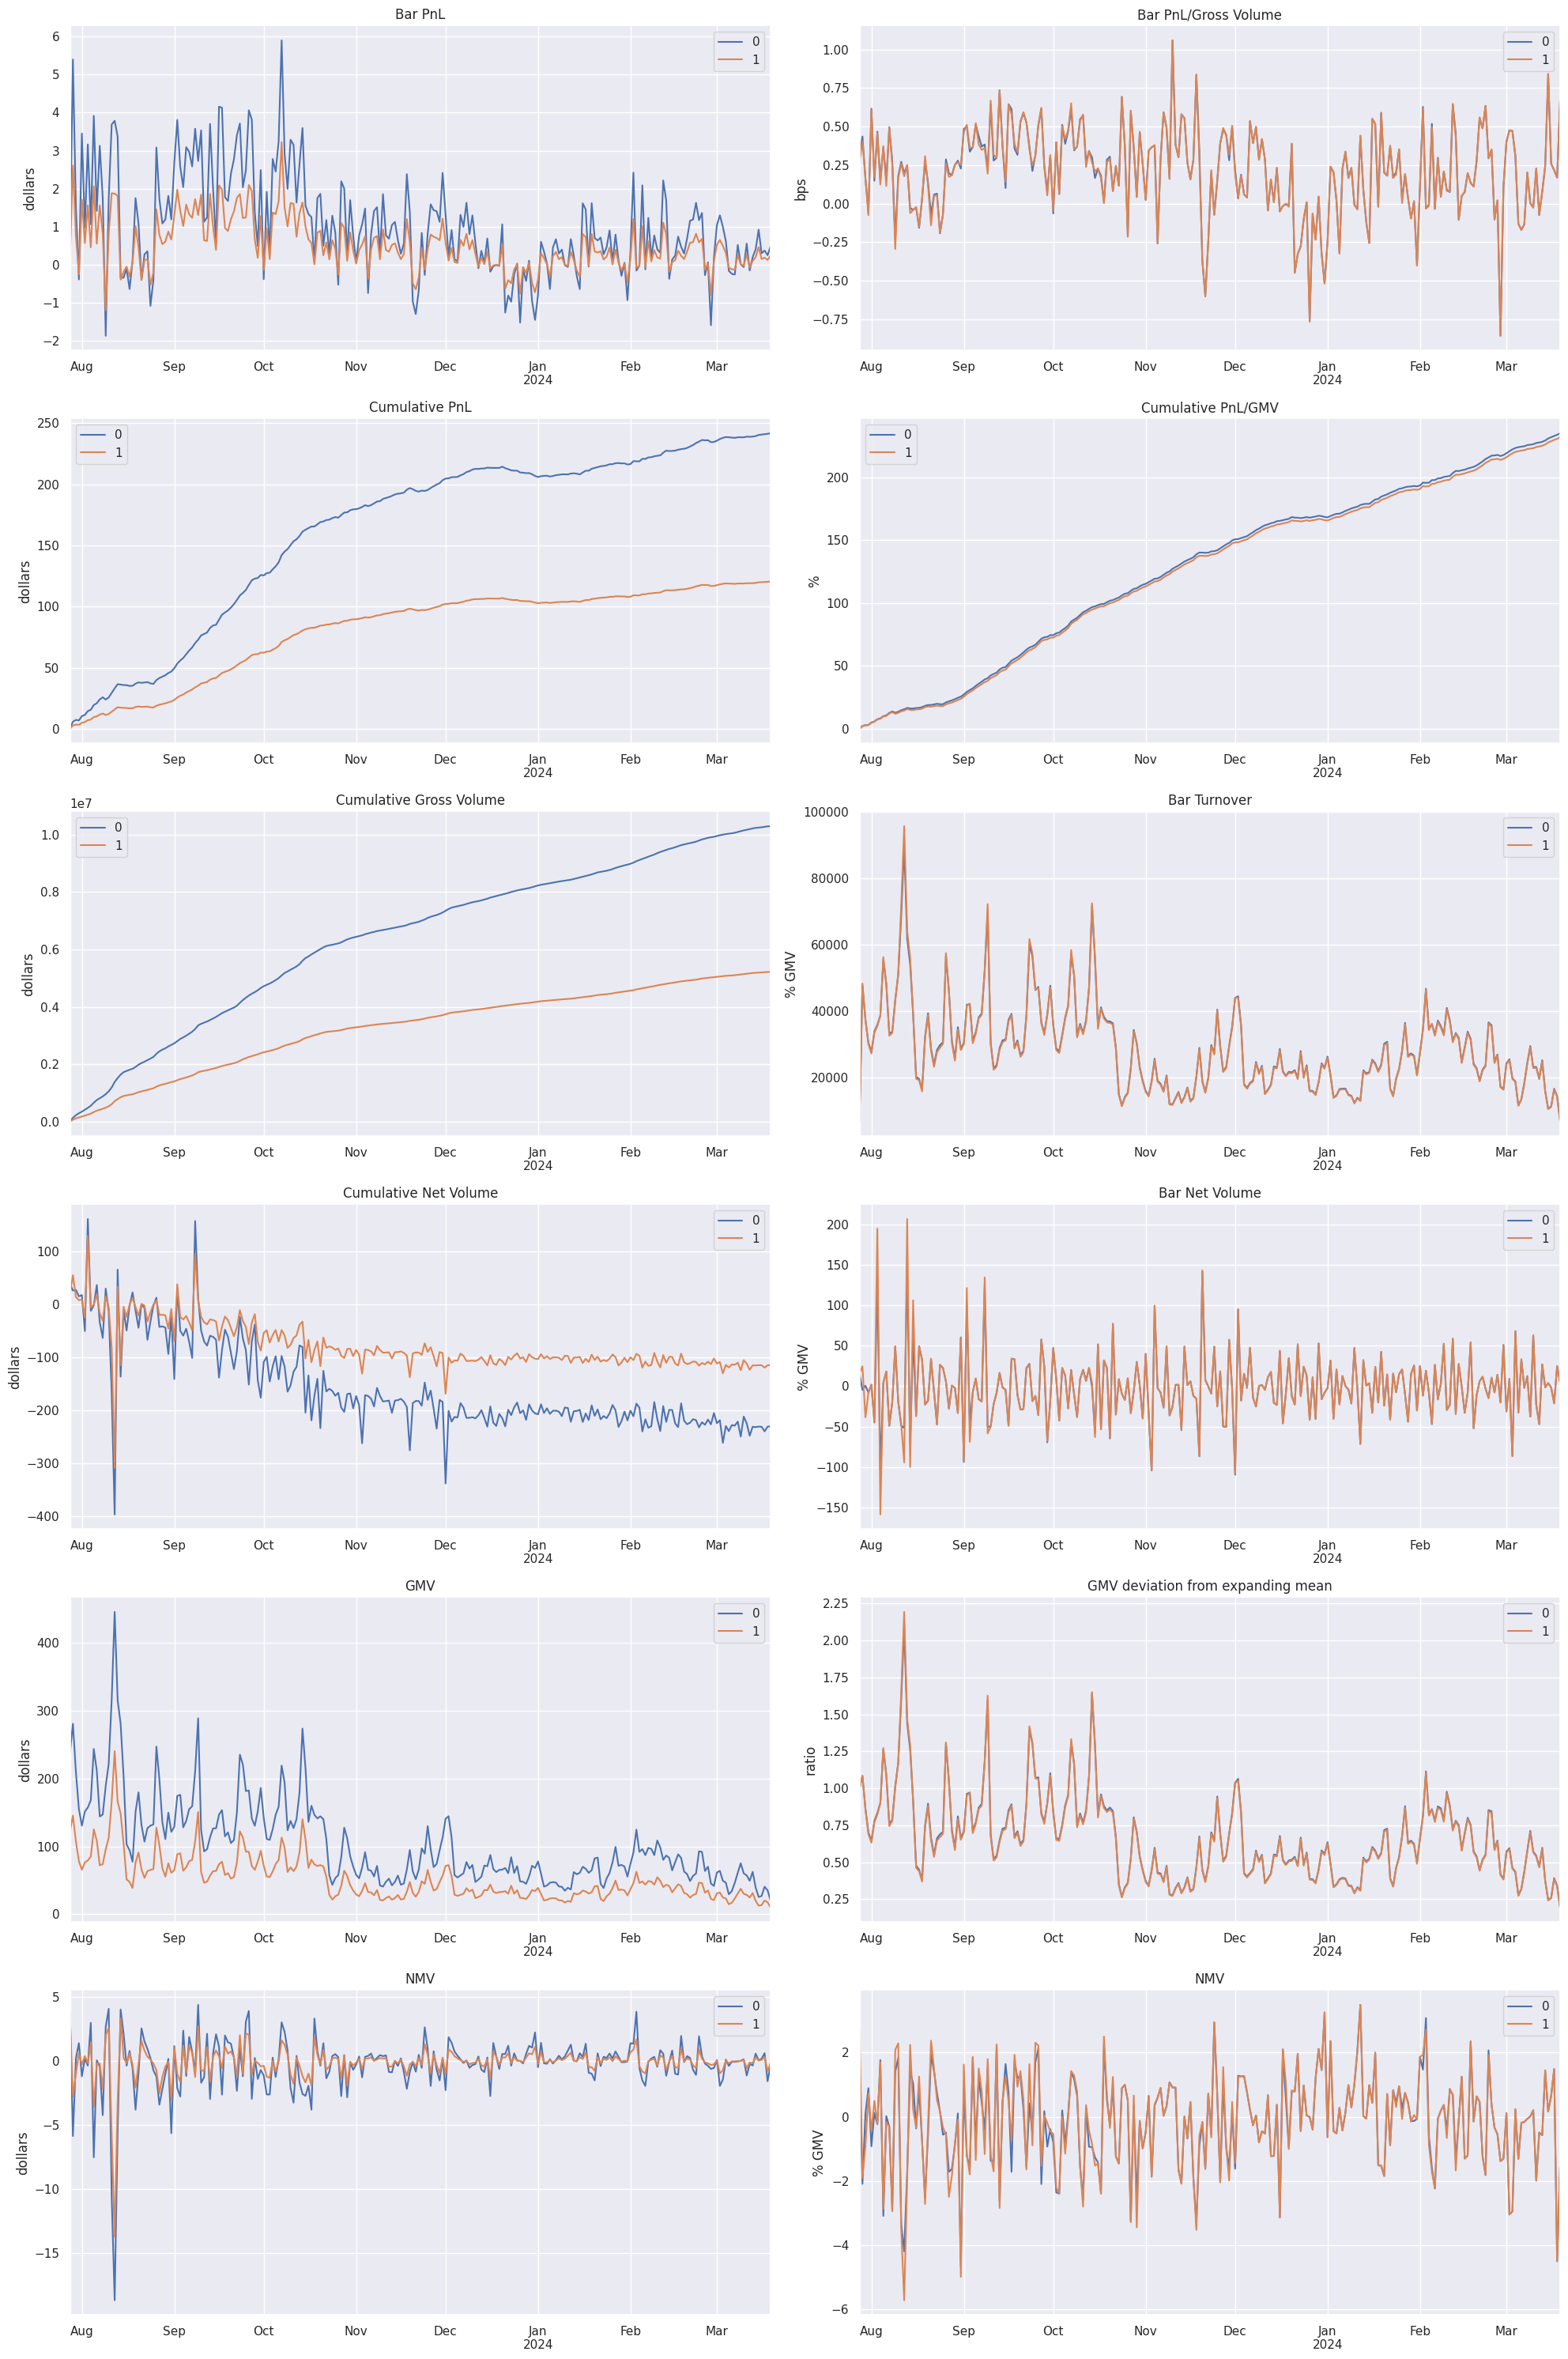

In [6]:
coplotti.plot_portfolio_stats(
    portfolio_stats_df, freq=default_config["pnl_resampling_frequency"]
)

# Aggregate portfolio stats

In [7]:
stats_computer = dtfmod.StatsComputer()

In [8]:
portfolio_stats, daily_metrics = stats_computer.compute_portfolio_stats(
    portfolio_stats_df,
    default_config["pnl_resampling_frequency"],
)
display(portfolio_stats)

0         1
ratios     sharpe_ratio                    14.70     14.40
           sharpe_ratio_standard_error      1.42      1.41
           sr.tval                         11.82     11.58
           sr.pval                          0.00      0.00
           kratio                           3.04      3.02
dollar     gmv_mean                       102.81     51.97
           gmv_stdev                       62.60     32.68
           annualized_mean_return         374.20    186.58
           annualized_volatility           25.45     12.95
           max_drawdown                     8.43      4.22
           pnl_mean                         1.02      0.51
           pnl_std                          1.33      0.68
           turnover_mean                43637.66  22127.87
           turnover_stdev               27128.26  14307.15
           market_bias_mean                -0.25     -0.13
           market_bias_stdev                2.16      1.35
percentage annualized_mean_return         363.98    359.01
           annualized_volatility           24.75     24.93
           max_drawdown                     8.20      8.11
           pnl_mean                         1.00      0.98
           pnl_std                          1.30      1.30
           turnover_mean                42446.72  42577.26
           turnover_stdev               26387.89  27529.04
           market_bias_mean                -0.25     -0.25
           market_bias_stdev                2.11      2.59